In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Get data and modify it to train model

In [4]:
# Download dataset
IRIS_TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
train_set=pd.read_csv(IRIS_TRAIN_URL,names=names,skiprows=1)
test_set=pd.read_csv(IRIS_TEST_URL,names=names,skiprows=1)

In [5]:
train_X=train_set.drop(columns="species",axis=1)
test_X=test_set.drop(columns="species",axis=1)
train_y=pd.get_dummies(train_set["species"])
test_y=pd.get_dummies(test_set["species"])

# Train model

In [106]:

def create_train_network(n_nodes,iterations):
    np.random.seed(100)
    X=tf.placeholder(shape=(120,4),dtype=tf.float64,name="X")
    y=tf.placeholder(shape=(120,3),dtype=tf.float64,name="y")
    
    #Weights for input layer and hidden layers
    w1=tf.Variable(np.random.rand(4,n_nodes),dtype=tf.float64)
#     b1=tf.Variable(np.random.rand(n_nodes),dtype=tf.float64)
    
    w2=tf.Variable(np.random.rand(n_nodes,n_nodes),dtype=tf.float64)
#     b2=tf.Variable(np.random.rand(n_nodes),dtype=tf.float64)
    
    w3=tf.Variable(np.random.rand(n_nodes,3),dtype=tf.float64)
#     b3=tf.Variable(np.random.rand(3),dtype=tf.float64)
    
    #create neural network graph
    h1=tf.sigmoid(tf.matmul(X,w1))
    h2=tf.sigmoid(tf.matmul(h1,w2))
    
    y_predict=tf.sigmoid(tf.matmul(h2,w3))
    
    #loss function
    deltas=tf.square(y_predict-y)
    loss=tf.reduce_sum(deltas)
    
    #Train operation to minimize loss
    optimizer=tf.train.AdamOptimizer(learning_rate=0.005)
    train=optimizer.minimize(loss)
    
    #initialize variable and run session
    init=tf.global_variables_initializer()
    sess=tf.Session()
    sess.run(init)
    
    #Training of network
    
    for i in range(0,iterations):
        sess.run(train,feed_dict={X:train_X,y:train_y})
        loss_plot.append(sess.run(loss, feed_dict={X: train_X.as_matrix(), y: train_y.as_matrix()}))
        weights1 = sess.run(w1)
        weights2 = sess.run(w2)
        weights3 = sess.run(w3)
        if(i%10==0):
            print(f"{i}/{iterations}  loss= {loss_plot[-1]}")
#         print("loss (hidden nodes: %d, iterations: %d): %.2f" % (10, iterations, loss_plot))
#         sess.close()
        
    return weights1, weights2,weights3
        
    
    
    

In [107]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations

loss_plot = []
weights1 = []
weights2 = []
num_iters = 4000

plt.figure(figsize=(12,8))
# for hidden_nodes in num_hidden_nodes:
weights1, weights2,weights3 = create_train_network(20, num_iters)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0/4000  loss= 239.90878780667742
10/4000  loss= 239.7463004179387
20/4000  loss= 239.22544267631466
30/4000  loss= 237.27286779240671
40/4000  loss= 228.805492106476
50/4000  loss= 192.69124905397462
60/4000  loss= 117.59865630830897
70/4000  loss= 79.8108426979995
80/4000  loss= 82.45278193529137
90/4000  loss= 77.96127423473689
100/4000  loss= 72.53358990913188
110/4000  loss= 66.86595439109013
120/4000  loss= 60.0678077839803
130/4000  loss= 53.4461716512707
140/4000  loss= 48.048703471162625
150/4000  loss= 43.90557946518729
160/4000  loss= 40.72328941958456
170/4000  loss= 38.14826655748535
180/4000  loss= 35.80230202490242
190/4000  loss= 33.526903708156354
200/4000  loss= 31.23313689157952
210/4000  loss= 28.905501961624353
220/4000  loss= 26.574689200006844
230/4000  loss= 24.283263419717294
240/4000  loss= 22.082947991864337
250/4000  loss= 20.029000161276734
260/4000  loss= 18.164253878324626
270/4000  loss= 16.508109792334118
280/4000  loss= 15.058944885480983
290/4000  loss

2440/4000  loss= 2.0626157212156295
2450/4000  loss= 2.061436759098415
2460/4000  loss= 2.0602791450435785
2470/4000  loss= 2.0591423123270456
2480/4000  loss= 2.0580257123317156
2490/4000  loss= 2.0569288138852944
2500/4000  loss= 2.0558511026211157
2510/4000  loss= 2.054792080354497
2520/4000  loss= 2.0537512645251645
2530/4000  loss= 2.052728187607831
2540/4000  loss= 2.0517223965827163
2550/4000  loss= 2.050733452413028
2560/4000  loss= 2.0497609295465837
2570/4000  loss= 2.0488044154388003
2580/4000  loss= 2.047863510104324
2590/4000  loss= 2.0469378256660993
2600/4000  loss= 2.0460269859395606
2610/4000  loss= 2.045130626023447
2620/4000  loss= 2.0442483919106986
2630/4000  loss= 2.043379940120743
2640/4000  loss= 2.0425249373382153
2650/4000  loss= 2.041683060064419
2660/4000  loss= 2.0408539942930233
2670/4000  loss= 2.0400374351845114
2680/4000  loss= 2.0392330867685278
2690/4000  loss= 2.0384406616477273
2700/4000  loss= 2.0376598807126625
2710/4000  loss= 2.036890472882605
2

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Loss')

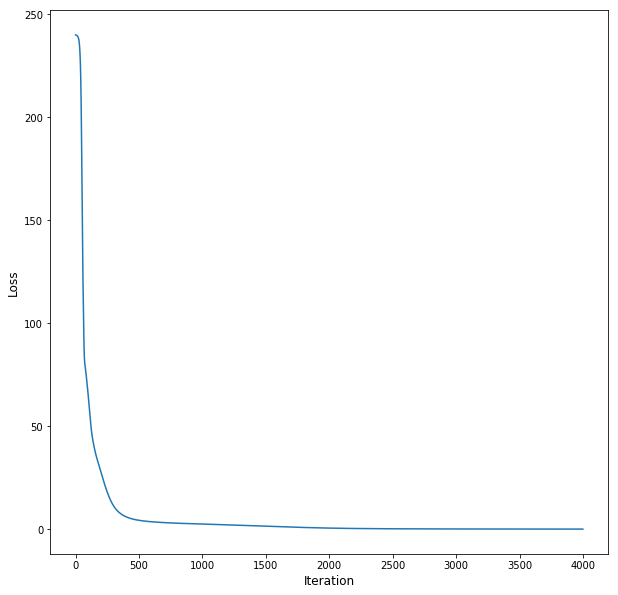

In [90]:
plt.figure(figsize=(10,10))

plt.plot(range(num_iters), loss_plot)
    
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)


# Prediction

In [120]:
def predict_value(test_X,test_y):
    np.random.seed(100)
    X=tf.placeholder(shape=(30,4),dtype=tf.float64,name="X")
    y=tf.placeholder(shape=(30,3),dtype=tf.float64,name="y")
    
    w1=weights1

    w2=weights2

    w3=weights3

    
    h1=tf.sigmoid(tf.matmul(X,w1))
    h2=tf.sigmoid(tf.matmul(h1,w2))
    y_est=tf.sigmoid(tf.matmul(h2,w3))
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_predict=sess.run(y_est,feed_dict={X:test_X,y:test_y})
       
        
    print(f"Predicted = {np.argmax(y_predict,axis=1)}")
    print(f"Actual = {np.argmax(test_y.values,axis=1)}")
    count =0
    for pred,actual in zip(np.argmax(y_predict,axis=1),np.argmax(test_y.values,axis=1)):
        if(pred==actual):
            count+=1
    
    accuracy=(count/30)*100
    print(f"Successful identification = {count}")
    print(f"Accuracy = {accuracy}")
    

In [121]:
predict_value(test_X,test_y)

Predicted = [1 2 0 1 1 1 0 2 1 2 2 0 2 1 1 0 1 0 0 2 0 1 2 2 1 1 0 1 2 1]
Actual = [1 2 0 1 1 1 0 2 1 2 2 0 2 1 1 0 1 0 0 2 0 1 2 1 1 1 0 1 2 1]
Successful identification = 29
Accuracy = 96.66666666666667
